In [77]:
from selenium import webdriver
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [60]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Here data contains the details of Red Wine which is in form of numerical data. Here quality is a target variable which has 6 categories so it will be termed as 'Classification Problem' where we have to find the quality of red wine

# Exploratory Data Analysis (EDA)

In [61]:
#checking rows and columns of data set
df.shape

(1599, 12)

There are 1599 rows and 21 columns out of which 1 is target variable and remaining 20 are independent variables.

In [62]:
df['quality'] = np.where(df['quality'] > 5, 1, df['quality'] )
df['quality'] = np.where(df['quality'] != 1, 0,  df['quality'])

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


We are creating a Classification model , so we will try to make the target variable into binary classification. If quality is more then 5 then will consider quality as 1 or else 0


In [63]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [64]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

There are 2 types of data types present(float 64, int64) in the data.

In [65]:
# to check null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


We can see there are no null values present in data 

<AxesSubplot:>

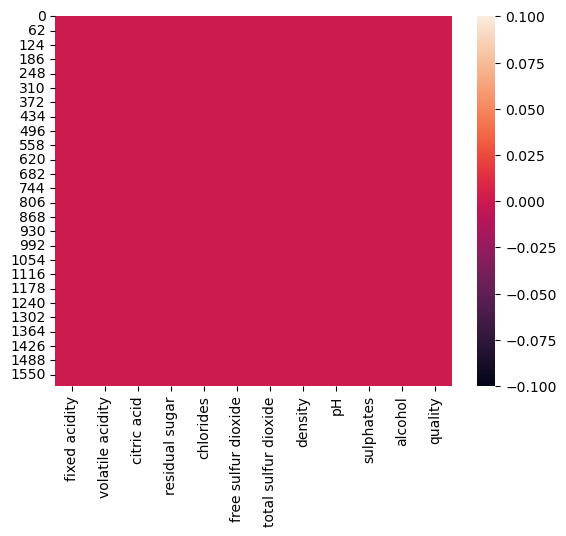

In [66]:
#lets visualise null values using heat map
sns.heatmap(df.isnull())

In [67]:
df['quality'].unique()

array([0, 1], dtype=int64)

in 'quality' column it has 2 categories viz. 0 and 1

In [68]:
df['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

In [69]:
# to check number of unique values in each column
df.nunique().to_frame('No of unique values')

,No of unique values
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


# Describing a data Set

In [70]:
# statistical description of data set
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


The summary of data set look perfect as there is no invalid data.
We can observe following points 
1) There is no missing values as count of all column is equal.
2) In quality column mean is less then median so data of quality is left skewed data.

# Data Visualisation

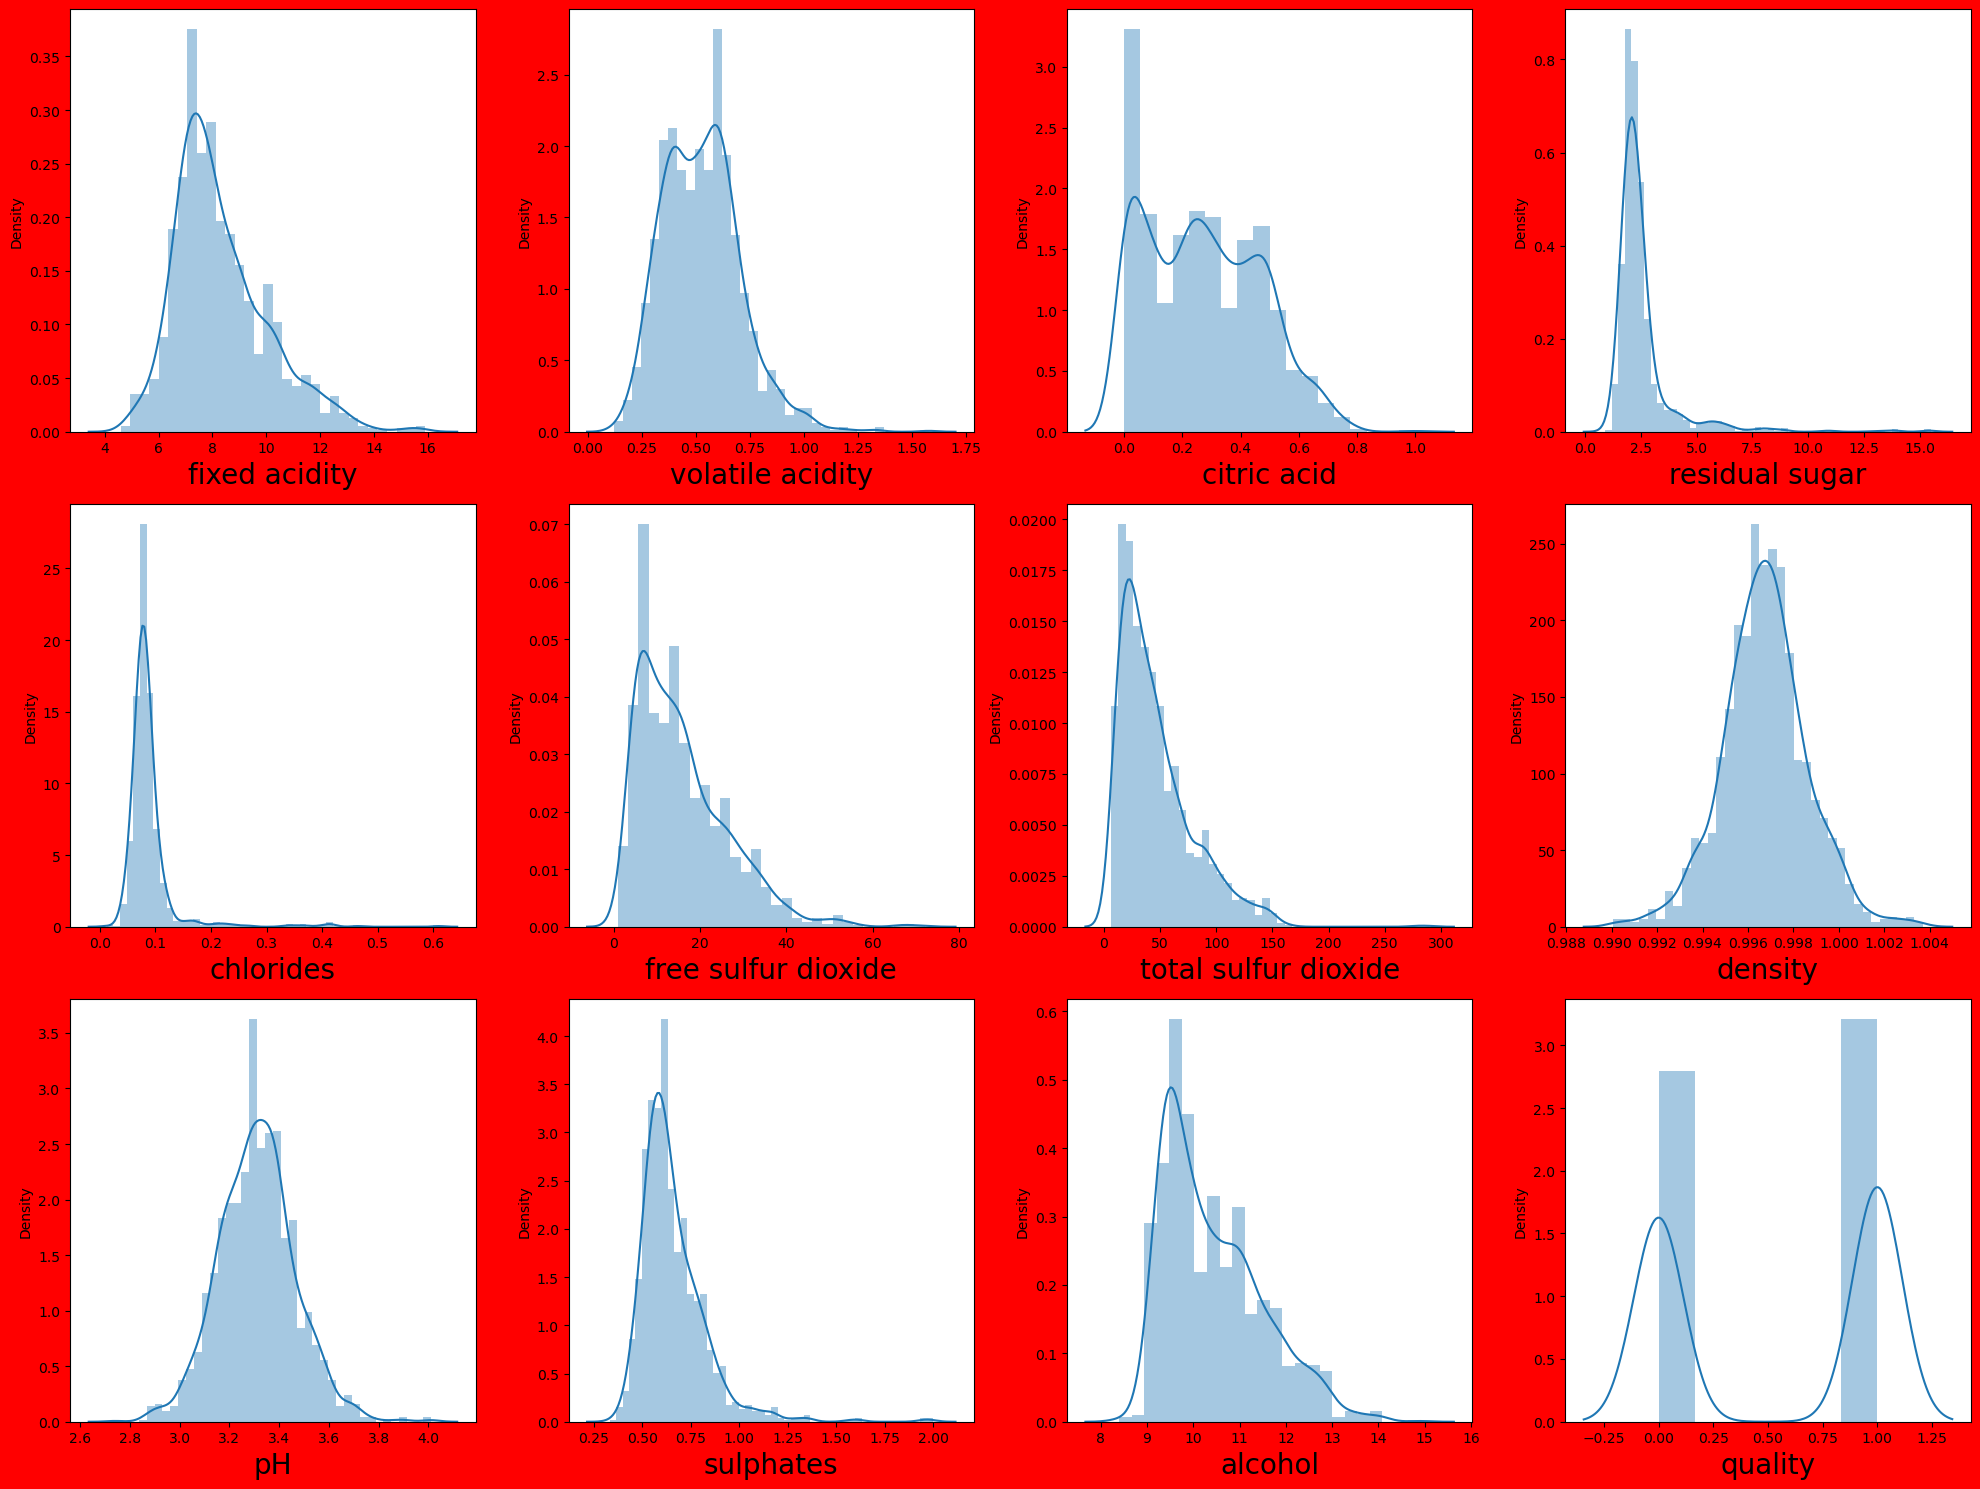

In [78]:
plt.figure(figsize =(20,15), facecolor = 'red')
plotnumber = 1

for column in df:
    if plotnumber <=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber +=1
plt.tight_layout()

We see skewness present in some of plots

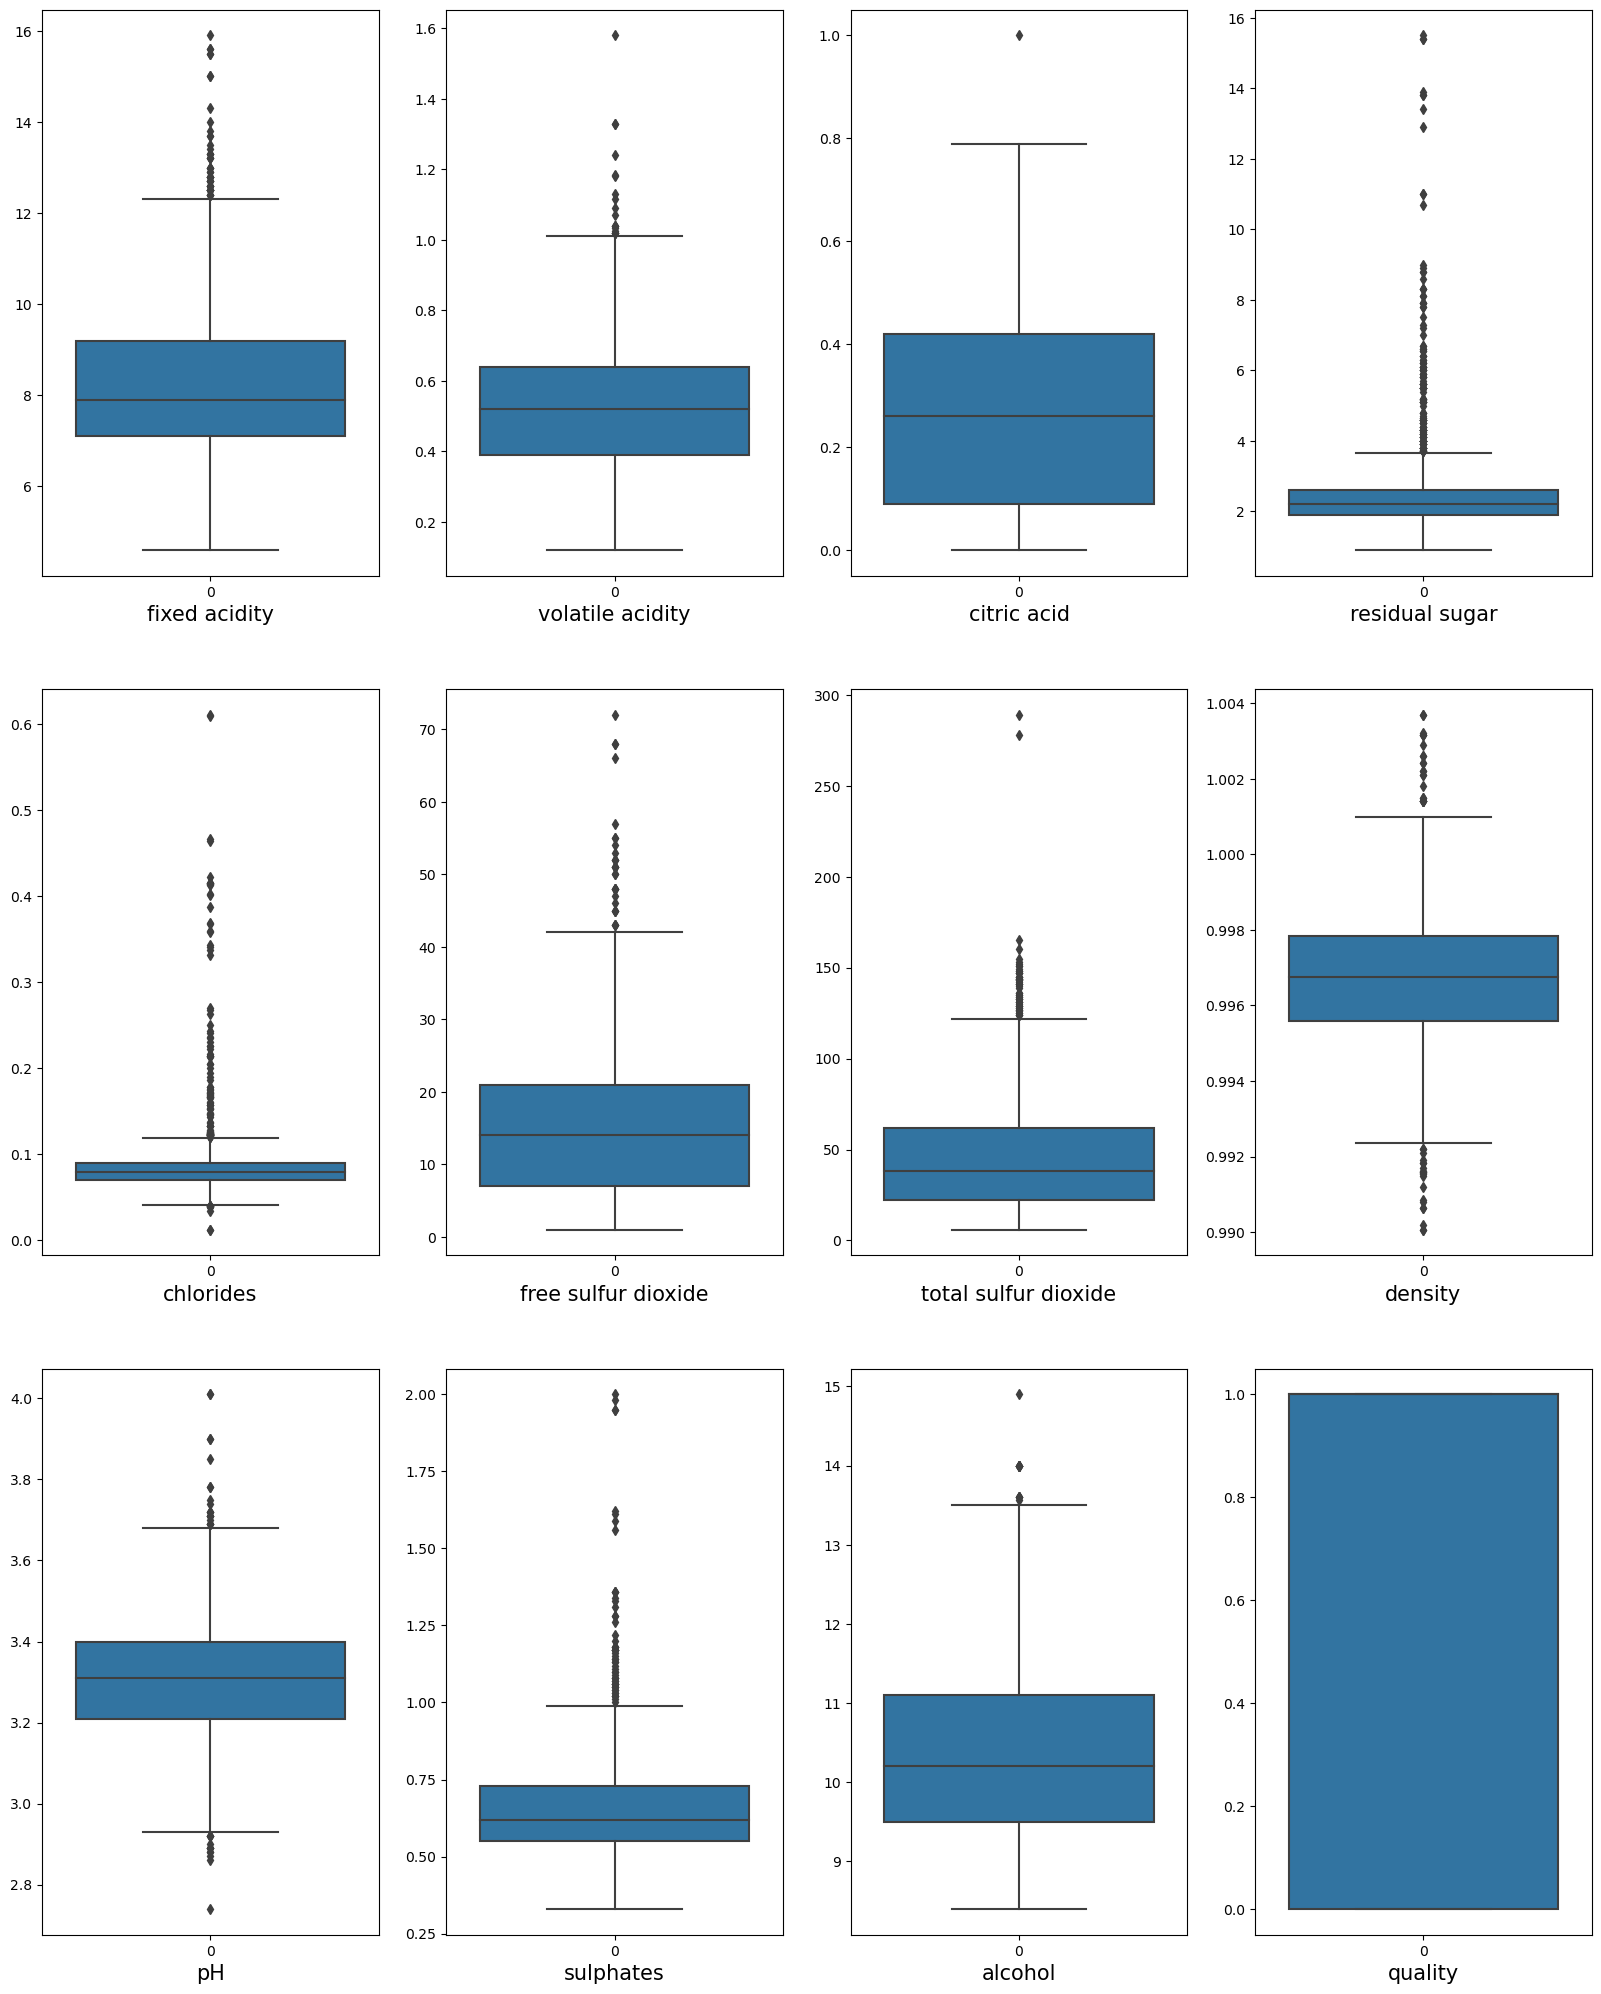

In [79]:
plt.figure(figsize =(20,25))
graph = 1

for column in df:
    if graph <=12: # as there are 9 columns in data
        plt.subplot(3,4,graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize = 15)
        
    graph +=1
plt.show()

we see that overall the data has many ouliers both on higher and lower ends but as we cannot remove any data due to the small number of data.

# USING CORRELATION AND TO FURTHER STUDY RELATIONSHIP

<AxesSubplot:>

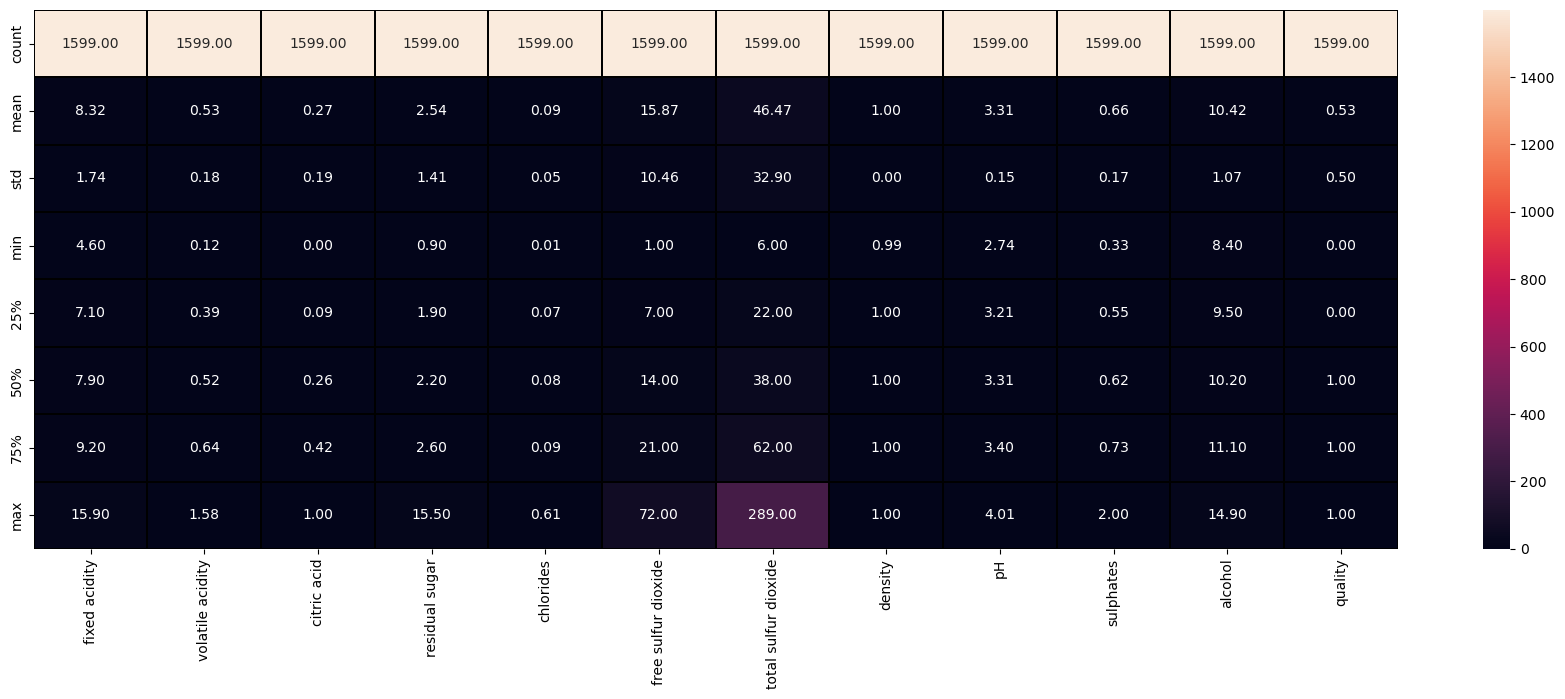

In [86]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt='0.2f')

we see the most correalation btw alcohol and qaulity
we see that the ph and residual sugar practically having very less relationship with the target variable (alcohol)

# seperating target variable and other variables

In [95]:
X=df.drop(['quality'],axis=1)
y=df['quality']

In [96]:
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [97]:
print(y)

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64


## Scaling Data

In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
scalar = StandardScaler()
X_scalar = scalar.fit_transform(x)
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report,r2_score
from sklearn.model_selection import train_test_split

In [122]:
for i in range(0,10):
    X_train,X_test,y_train,y_test = train_test_split(X_scalar,y,test_size = 0.25,random_state = 355)
    lr.fit(X_train,y_train)
    pred_train = lr.predict(X_train)
    pred_test=lr.predict(X_test)
    print(f"At random state {i},the training accuracy is :-{r2_score(y_train,pred_train)}")
    print(f"At random state {i},the training accuracy is :-{r2_score(y_test,pred_test)}")
    print('\n')

At random state 0,the training accuracy is :-0.029244992295839767
At random state 0,the training accuracy is :--0.17105394855369838


At random state 1,the training accuracy is :-0.029244992295839767
At random state 1,the training accuracy is :--0.17105394855369838


At random state 2,the training accuracy is :-0.029244992295839767
At random state 2,the training accuracy is :--0.17105394855369838


At random state 3,the training accuracy is :-0.029244992295839767
At random state 3,the training accuracy is :--0.17105394855369838


At random state 4,the training accuracy is :-0.029244992295839767
At random state 4,the training accuracy is :--0.17105394855369838


At random state 5,the training accuracy is :-0.029244992295839767
At random state 5,the training accuracy is :--0.17105394855369838


At random state 6,the training accuracy is :-0.029244992295839767
At random state 6,the training accuracy is :--0.17105394855369838


At random state 7,the training accuracy is :-0.029244992295839

In [126]:
#the model is having too less accracy scores so we try another method 
x_train,x_test,y_train,y_test = train_test_split(X_scalar,y,test_size = 0.25,random_state = 355) 

In [127]:
def metric_score(clf,X_train,X_test,y_train,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train)
        
        print("\n===============================Train Result=============================")
        
        print(f"Accuracy score : {accuracy_score(y_train,y_pred) * 100: .2f}%")
        
    elif train == False:
        pred = clf.predict(X_test)
        
        print("\n===============================Test Result===============================")
        print(f"Accuracy Scorre : {accuracy_score(y_test,pred) * 100: .2f}%")
        
        
        print ('\n \n Test Classification Report \n', classification_report(y_test, pred, digits = 2)) 
        ##Model Confidence /Accurancy
        

In [128]:
#Call the function and pass dataset to check the train score and the test score

metric_score(lr,X_train,X_test,y_train,y_test,train=True) #This is for the Training Score

metric_score(lr,X_train,X_test,y_train,y_test,train=False) #This is for the Testing Score


===============================Train Result=============================
Accuracy score :  75.90%

===============================Test Result===============================
Accuracy Scorre :  70.75%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.69      0.72      0.70       194
           1       0.72      0.70      0.71       206

    accuracy                           0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.71      0.71      0.71       400



## Logistic Regression

In [129]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
predlr = lr.predict(X_test)
print('Accuracy', accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 70.75
[[139  55]
 [ 62 144]]
              precision    recall  f1-score   support

           0       0.69      0.72      0.70       194
           1       0.72      0.70      0.71       206

    accuracy                           0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.71      0.71      0.71       400



Accuraccy is 70.75% so lets try other model

## Random Forest Algorithm

In [130]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200)
rf.fit(X_train,y_train)
predrf = rf.predict(X_test)

print('Test Accuracy', accuracy_score(y_test,predrf)*100)

print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Test Accuracy 80.25
[[154  40]
 [ 39 167]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       194
           1       0.81      0.81      0.81       206

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



Accuracy is 80% lets try other model

In [131]:
from sklearn.svm import SVC

svc= SVC()
svc.fit(X_train,y_train)
predsvc = svc.predict(X_test)

print('Test Accuracy', accuracy_score(y_test,predsvc)*100)

print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Test Accuracy 73.5
[[154  40]
 [ 66 140]]
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       194
           1       0.78      0.68      0.73       206

    accuracy                           0.73       400
   macro avg       0.74      0.74      0.73       400
weighted avg       0.74      0.73      0.73       400



Accuraccy is 73 % in SVC 


### WE got a lesser score on SVC so we can assume that Random forest classifier is the best algorithm

# ROC AUC curve

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()

#Creating parameters to pass in GridSearchCV

parameters = {'max_features' :['auto','sqrt','log2'],
             'max_depth' :[4,5,6,7,8],
              'criterion' : ['gini', 'entropy'],
              'n_estimators' : [100,200,300,400,500]
             }

GCV = GridSearchCV(estimator =rf,param_grid=parameters,cv=7,scoring='accuracy')
GCV.fit(x_train,y_train) #fitting data into the model
GCV.best_params_ #printing the best parameters found by the GridSearchCV

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()